# Multiple Linear Regression

#### Importing the Necessary Liabrary

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [23]:
DF_data = pd.read_csv("multiple_linear_regression_data.csv")
DF_data
DF_data.shape
DF_data.head(10)
DF_data.tail(10)

,TV_Ad_Spend,Social_Media_Spend,Newspaper_Spend,Sales_Revenue
40,55,16,42,231.525174
41,59,46,13,241.200444
42,68,66,32,328.386865
43,7,72,39,199.743297
44,55,10,49,212.690615
45,11,2,32,71.158767
46,25,9,4,87.813545
47,77,64,30,355.706608
48,43,12,37,178.272987
49,22,9,23,104.884684


#### Checking Null Values

In [24]:
DF_data.isnull().sum()

TV_Ad_Spend           0
Social_Media_Spend    0
Newspaper_Spend       0
Sales_Revenue         0
dtype: int64

#### Making Visualisations


In [25]:
import seaborn as sns 
sns.pairplot(DF_data)

In [26]:
DF_data.corr()

,TV_Ad_Spend,Social_Media_Spend,Newspaper_Spend,Sales_Revenue
TV_Ad_Spend,1.000000,0.244639,-0.213285,0.854072
Social_Media_Spend,0.244639,1.000000,-0.020189,0.676483
Newspaper_Spend,-0.213285,-0.020189,1.000000,0.015160
Sales_Revenue,0.854072,0.676483,0.015160,1.000000


#### Finding the relationship between the two variables

##### The Below plots will show the if feature 1increse then feature 2 aalso increase or decrease accordingly

In [27]:
plt.scatter(DF_data['Social_Media_Spend'],DF_data['TV_Ad_Spend'])

In [28]:
plt.scatter(DF_data['Newspaper_Spend'],DF_data['TV_Ad_Spend'])

In [29]:
plt.scatter(DF_data['TV_Ad_Spend'],DF_data['Sales_Revenue'])


#### Dividing Independent and dependent Feature

In [30]:
# X = DF_data[['TV_Ad_Spend', 'Social_Media_Spend', 'Newspaper_Spend']]
# Y = DF_data[['Sales_Revenue']]

# THE ABOVE CODECAN BE WRITTEN EASILY USING ILOC AS SHOWN BELOW
X = DF_data.iloc[:,:-1]
Y = DF_data.iloc[:,-1]

X
Y

0     200.363525
1     410.736130
2     127.214602
3     223.118665
4     316.565296
5     124.183152
6     378.448390
7     394.119171
8     284.487879
9     228.355762
10    335.813206
11    153.151538
12    201.629785
13    174.401109
14    300.520416
15     55.321177
16    273.449606
17    140.443379
18    246.648475
19     79.266784
20    315.450247
21    321.318317
22    128.618671
23    225.074422
24    265.869697
25    334.431063
26    229.306614
27    313.607415
28    239.186308
29    274.167636
30    290.869915
31    264.087553
32    395.033635
33    260.624934
34    356.791170
35    129.479175
36    235.585080
37    290.667606
38    227.790113
39    265.072856
40    231.525174
41    241.200444
42    328.386865
43    199.743297
44    212.690615
45     71.158767
46     87.813545
47    355.706608
48    178.272987
49    104.884684
Name: Sales_Revenue, dtype: float64

#### Splitting data into train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train ,Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

X.describe()

,TV_Ad_Spend,Social_Media_Spend,Newspaper_Spend
count,50.000000,50.0000,50.00000
mean,54.200000,37.9600,26.22000
std,27.653837,24.9096,13.98292
min,6.000000,2.0000,1.00000
25%,26.500000,12.7500,14.00000
50%,58.000000,41.5000,29.00000
75%,76.750000,61.0000,37.00000
max,97.000000,79.0000,49.00000


In [32]:
X_train.describe()

,TV_Ad_Spend,Social_Media_Spend,Newspaper_Spend
count,37.000000,37.000000,37.000000
mean,57.810811,36.135135,24.648649
std,26.960710,23.498419,14.526253
min,6.000000,3.000000,1.000000
25%,37.000000,15.000000,12.000000
50%,59.000000,41.000000,27.000000
75%,79.000000,55.000000,35.000000
max,97.000000,79.000000,49.000000


In [33]:
X_test.describe()

,TV_Ad_Spend,Social_Media_Spend,Newspaper_Spend
count,13.000000,13.000000,13.000000
mean,43.923077,43.153846,30.692308
std,28.060831,28.942029,11.664652
min,6.000000,2.000000,1.000000
25%,26.000000,12.000000,26.000000
50%,43.000000,54.000000,34.000000
75%,65.000000,63.000000,37.000000
max,96.000000,79.000000,44.000000


### Plotting An important plot from Seaborn

In [34]:
import seaborn as sns

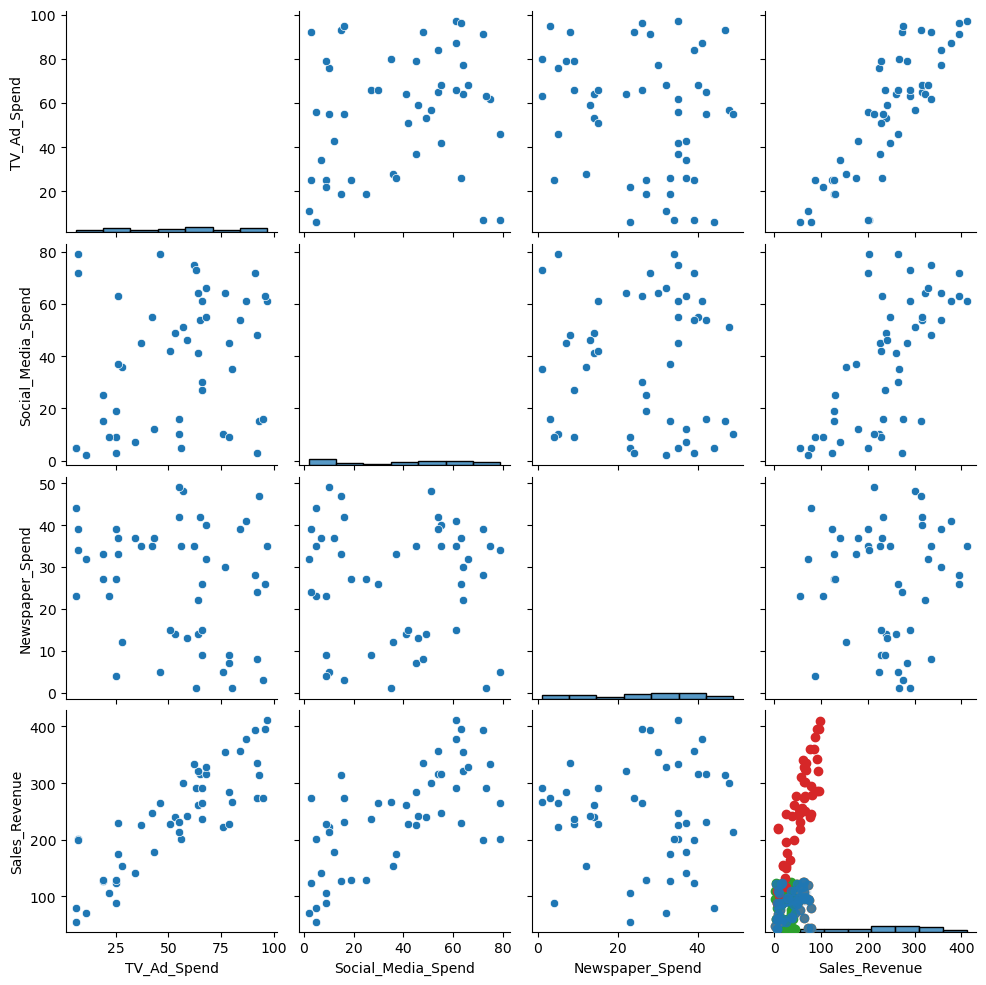

In [35]:
sns.regplot(x=DF_data['Social_Media_Spend'], y=DF_data['TV_Ad_Spend'])
plt.show()


### Standardizing

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[-1.19617033,  0.03731292,  0.5828446 ],
       [ 0.3079351 , -0.26468852,  0.09431142],
       [ 0.19512719,  1.59046319, -1.65044992],
       [-1.76020987, -1.47269429,  0.51305415],
       [-0.89534925, -1.25697897,  0.86200642],
       [-0.55692552, -1.04126366,  0.86200642],
       [-1.19617033,  1.15903256,  0.86200642],
       [ 0.15752456,  1.67674932,  0.72242551],
       [ 1.43601417,  1.15903256,  0.09431142],
       [-1.94822305, -1.3432651 ,  1.35053959],
       [-1.91062041,  1.84932157,  0.65263505],
       [ 0.27033246,  0.77074499,  1.21095869],
       [ 0.3079351 ,  1.07274643, -0.67338357]])

#### Choosing Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

#### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [39]:
np.mean(val_score)

-46.70269459332585

#### Prediction

In [40]:
y_pred = regression.predict(X_test)
y_pred

array([176.79662816, 255.97150312, 294.58202983,  75.46248335,
       148.17689631, 179.66594191, 228.13833758, 337.35349374,
       390.10576143,  83.00728632, 205.40882359, 315.95450578,
       297.84328561])

In [41]:
## Performance metrics
y_pred
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

22.84214438313579
4.074136046100891
4.7793456019768845


In [42]:
from sklearn.metrics import r2_score
r2score = r2_score(Y_test,y_pred)
print(r2score)

0.9974566524350061
